## Data Visualization Course | VNU-HCM University of Science.
### LAP02 - Working with time-series data
#### **STEP 03 - Example - DATA EXPLORATION AND VISUALIZATION**

In [1]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [2]:
from Libraries import *
from Shared_Functions import *

**Đọc dữ liệu từ file đã được xử lý**

In [3]:
dataset_source_path = getGranDir() / 'Dataset'
processed_dataset_path = dataset_source_path / 'google_processed.csv'
df = getDataFrame(processed_dataset_path)

In [4]:
#TEST
df.head(10)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
1,2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2,2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
3,2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
4,2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086
5,2004-08-26,53.773445,52.134586,52.279045,53.753517,7128620.0,53.753517
6,2004-08-27,54.107193,52.647663,53.848164,52.876804,6241307.0,52.876804
7,2004-08-30,52.548038,50.814533,52.443428,50.814533,5221498.0,50.814533
8,2004-08-31,51.661362,50.889256,50.958992,50.993862,4941252.0,50.993862
9,2004-09-01,51.292744,49.648903,51.158245,49.937820,9181687.0,49.937820


**Nhận xét:** qua quá trình pre-proccessing trước đó thì ta nhận thấy tập dữ liệu đã được xử lý hoàn thiện. Khi này ta chỉ cần thực hiện bước tiếp sau khi đọc lại tập dữ liệu là thay đổi kiểu dữ liệu cho các cột sao cho chính xác.

In [5]:
df = changeDataType(df)

In [6]:
#TEST
df.dtypes

Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume              float64
Adj Close           float64
dtype: object

---

### DATA EXPLORATION & DATA VISUALIZATION

#### __Góc nhìn 1: Phân tích xu hướng lịch sử của giá cổ phiếu (những biến động dài hạn):__

#### __1. Giá cổ phiếu của Google đã thay đổi như thế nào từ khi bắt đầu giao dịch đến nay? Có xu hướng tăng hay giảm dài hạn không?__

Chúng ta cùng quan sát qua hình ảnh trực quan dưới đây: 

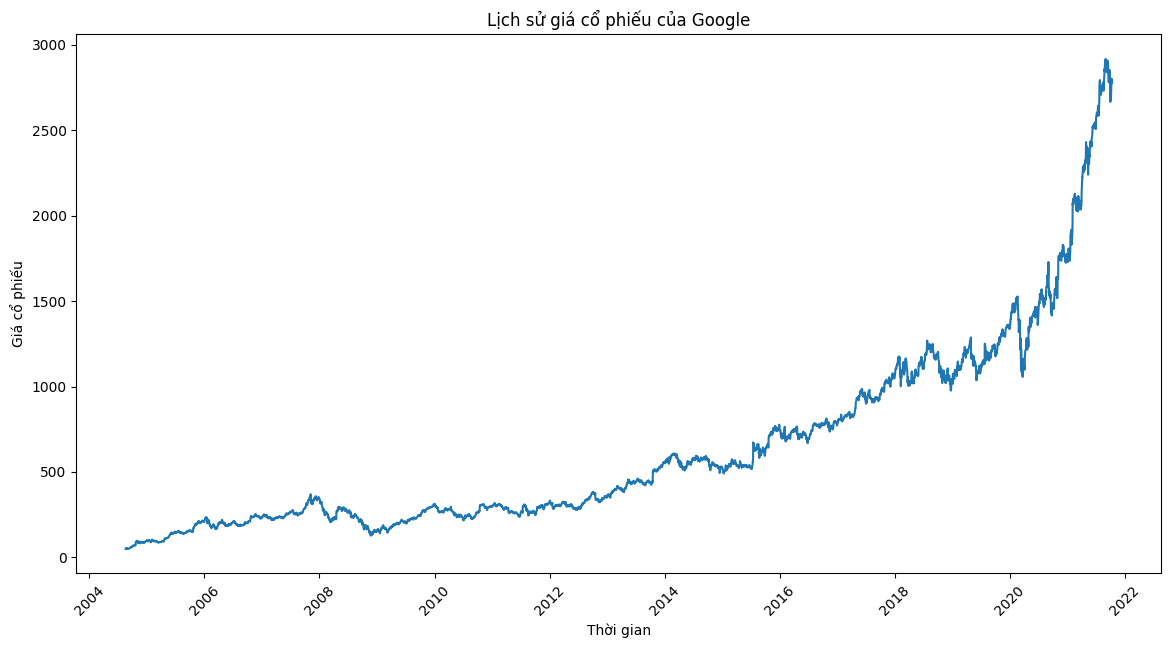

In [21]:
df = df.sort_values(by='Date')
df = df.reset_index(drop=True)
# vẽ, hiển thị thời gian cuôi cùng
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'])
plt.xlabel('Thời gian')
plt.ylabel('Giá cổ phiếu')
plt.title('Lịch sử giá cổ phiếu của Google')
plt.xticks(rotation=45)
plt.show()

#### ___Tại sao sử dụng biểu đồ đường lại phù hợp cho việc thể hiện xu hướng giá cổ phiếu qua từng ngày từ năm 2004 đến năm 2021?___ 

Biểu đồ đường có thể biểu diễn xu hướng dài hạn rõ ràng, kết nối các giá trị liên tiếp theo thời gian. Chính vì thế mà người dùng có thể dễ dàng trực quan xu hướng tăng hay giảm của giá cổ phiếu qua các năm. 

#### ___Nhận xét___

1. Xu hướng tăng mạnh mẽ theo thời gian:
    - Từ năm 2004 đến khoảng 2015:

        - Giá cổ phiếu tăng ổn định, nhưng mức độ tăng không quá lớn.
        - Thị trường chủ yếu trong giai đoạn tăng trưởng đều, phù hợp với sự phát triển của Google ở giai đoạn đầu với doanh thu chủ yếu từ quảng cáo trực tuyến.
    - Từ 2016 đến 2022:

        - Giá cổ phiếu bắt đầu tăng nhanh hơn, đặc biệt sau năm 2020, với mức tăng đột biến rõ rệt.
        - Đây là giai đoạn Google (Alphabet) mở rộng sang nhiều lĩnh vực khác như dịch vụ đám mây (Google Cloud), trí tuệ nhân tạo, và doanh thu tăng mạnh từ YouTube.
2. Giai đoạn biến động lớn:
    - Khủng hoảng tài chính 2008-2009:

        - Giá cổ phiếu giảm mạnh, thể hiện qua sự chững lại rõ rệt trong xu hướng tăng.
        - Nguyên nhân chủ yếu do tác động tiêu cực của khủng hoảng kinh tế toàn cầu.
    - 2020 (COVID-19):

        - Có một đợt giảm nhẹ trong giá vào đầu năm 2020, nhưng sau đó phục hồi và tăng trưởng rất mạnh.
        - Nguyên nhân:
            - Đại dịch thúc đẩy sự chuyển đổi số, tăng nhu cầu sử dụng các dịch vụ của Google như tìm kiếm trực tuyến, đám mây, YouTube.
            - Kỳ vọng nhà đầu tư về việc Alphabet sẽ hưởng lợi từ xu hướng này.
3. Giai đoạn tăng trưởng vượt bậc (2020-2022):
    - Giá cổ phiếu tăng mạnh nhất trong giai đoạn này, đạt đỉnh vào cuối năm 2021, đầu năm 2022.
    - Nguyên nhân:
        - Lợi nhuận kỷ lục từ mảng quảng cáo trực tuyến và sự phát triển của các dịch vụ mới.   
        - Tâm lý lạc quan của nhà đầu tư với cổ phiếu công nghệ trong bối cảnh thế giới chuyển đổi số.

#### __Giá cổ phiếu trong năm 2021__
___Ta cùng quan sát thêm một biểu đồ đường nữa về xu hướng của giá cổ phiếu trong năm 2021 dưới đây:___

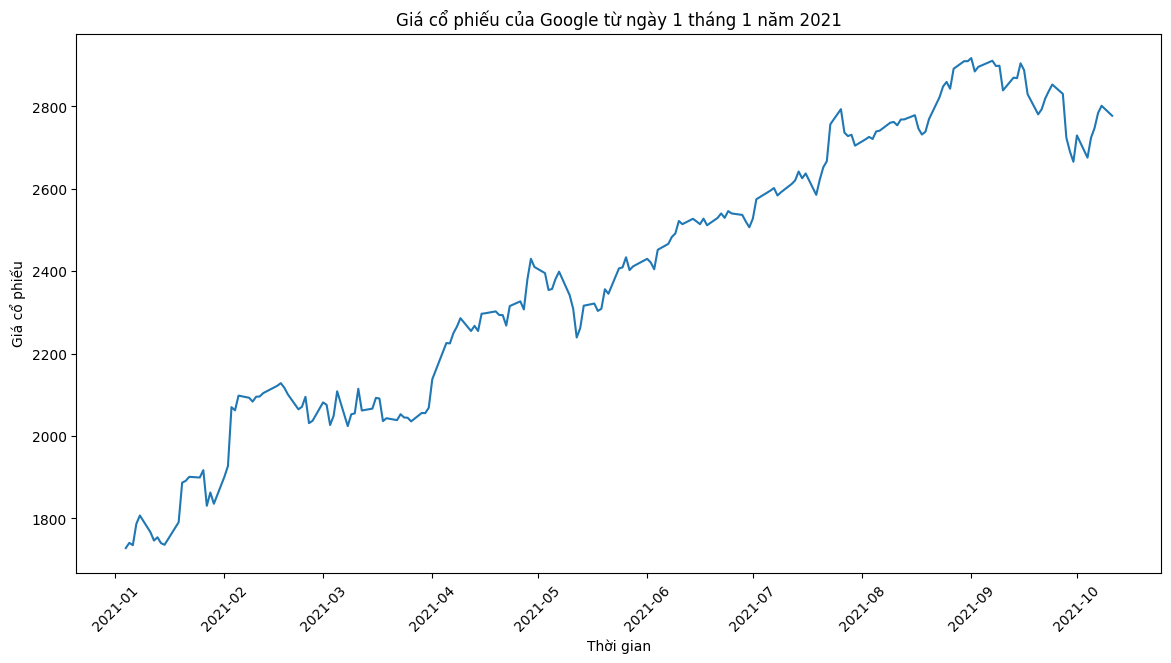

In [22]:
# vẽ biểu đồ đường gồm ngày và giá đóng cửa, ngày dữ liệu bắt đầu từ ngày 1 tháng 1 năm 2021 trở đi
df_2021 = df[df['Date'] >= '2021-01-01']
df_2021 = df_2021.sort_values(by='Date')
df_2021 = df_2021.reset_index(drop=True)
# vẽ, hiển thị thời gian cuôi cùng
plt.figure(figsize=(14, 7))
plt.plot(df_2021['Date'], df_2021['Close'])
plt.xlabel('Thời gian')
plt.ylabel('Giá cổ phiếu')
plt.title('Giá cổ phiếu của Google từ ngày 1 tháng 1 năm 2021')
plt.xticks(rotation=45)
plt.show()


- Ở biểu đồ trên, ta có thể thấy giá cố phiếu thời gian gần đây vẫn có xu hướng tăng từ đầu năm 2021 đến đầu tháng 9, sau đó có xu hướng giảm nhưng không đáng kể, và khả năng sẽ tiếp tục tăng theo dự đoán trước đó.

#### ___Kết luận___
- Biểu đồ cho thấy xu hướng tăng trưởng dài hạn của giá cổ phiếu Google, với các giai đoạn tăng trưởng mạnh rõ rệt sau các sự kiện quan trọng như:

    - Sự mở rộng lĩnh vực kinh doanh của Alphabet.
    - Tác động tích cực của chuyển đổi số do COVID-19.
- Tuy nhiên, cổ phiếu Google cũng chịu ảnh hưởng từ các biến động kinh tế toàn cầu như khủng hoảng tài chính 2008 và giai đoạn đầu của đại dịch COVID-19. Nhìn chung, đây là một cổ phiếu có xu hướng tăng trưởng vượt bậc trong dài hạn.

#### __2. Những giai đoạn nào giá cổ phiếu có sự biến động mạnh nhất (dựa trên chênh lệch giá mở cửa và đóng cửa)?__

Dưới đây là biểu đồ thể hiện sự biến động của giá cổ phiếu, với trên mức 0 là giá cố phiếu tăng và dưới mức 0 là giá cổ phiếu giảm. Mức biến động của giá cổ phiếu được tính bằng giá đóng – giá mở (Close - Open). 

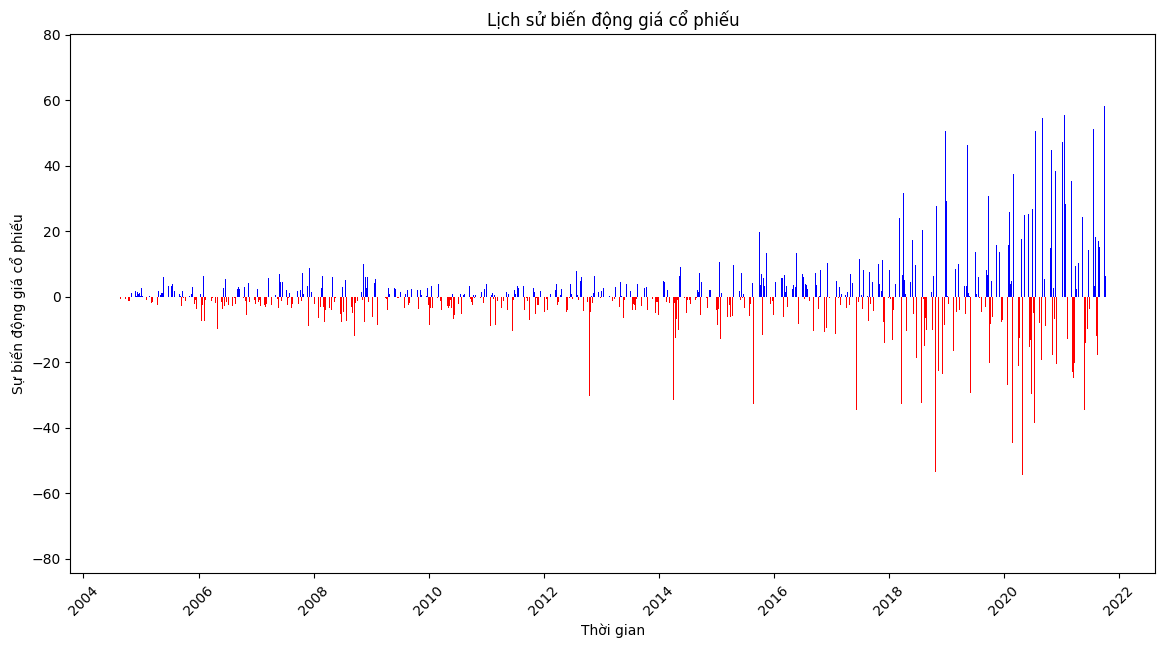

In [19]:
# vẽ biểu đồ thể hiện mức độ biến động của cổ phiếu qua các ngày(giá đóng - giá mở), có âm và dương, biểu thị màu xanh và đỏ, xanh cho biến động tăng, đỏ cho biến động giảm
df['Price Change'] = df['Close'] - df['Open']
plt.figure(figsize=(14, 7))
plt.bar(df['Date'], df['Price Change'], color=['red' if x < 0 else 'blue' for x in df['Price Change']])
plt.xlabel('Thời gian')
plt.ylabel('Sự biến động giá cổ phiếu')
plt.title('Lịch sử biến động giá cổ phiếu')
plt.xticks(rotation=45)
plt.show()


#### ___Tại sao sử dụng biểu đồ cột đối xứng lại phù hợp cho việc miêu tả sự biến động của cổ phiếu (với trên mức 0 là giá cổ phiếu tăng và dưới mức tăng là giá cổ phiếu giảm)?___ 

Biểu đồ cột đối xứng giúp người xem dễ dàng nhận biết được sự chênh lệch giữa giá mở cửa và giá đóng cửa. Nếu giá đóng cửa cao hơn giá mở cửa, cột sẽ nằm ở trên trục 0 (màu xanh), và ngược lại, cột sẽ nằm ở dưới trục 0 (màu đỏ).  

Mặt khác, người xem còn có thể so sánh sự biến động tăng giảm rõ ràng theo từng ngày trong cùng một biểu đồ. 

#### ___Nhận xét___
- Biến động tăng dần theo thời gian:

    - Từ giai đoạn 2004 đến khoảng 2017, mức độ biến động (cả tăng và giảm) của giá cổ phiếu Google tương đối thấp và ổn định.
    - Từ 2018 trở đi, đặc biệt vào giai đoạn 2020-2021, biến động bắt đầu tăng mạnh với biên độ lớn hơn (cả giá tăng mạnh và giảm mạnh).
- Xu hướng dương chiếm ưu thế:

    - Các thanh màu xanh (biến động tăng) xuất hiện nhiều hơn, đặc biệt từ 2020 trở đi. Điều này cho thấy xu hướng tích cực của giá cổ phiếu.
- Những giai đoạn giảm mạnh:

    - Có một số thanh đỏ dài, đặc biệt vào giai đoạn khủng hoảng (có thể liên quan đến các sự kiện lớn như khủng hoảng tài chính 2008 hoặc COVID-19 2020). Điều này phản ánh mức giảm đột ngột của giá cổ phiếu trong các sự kiện lớn.


#### ___Giai đoạn biến động mạnh mẽ của giá cổ phiếu (2020) do COVID-19___

C:\Users\NGUYENDINHTRI\AppData\Local\Temp\ipykernel_11144\4172759423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['Price Change'] = df_2019['Close'] - df_2019['Open']


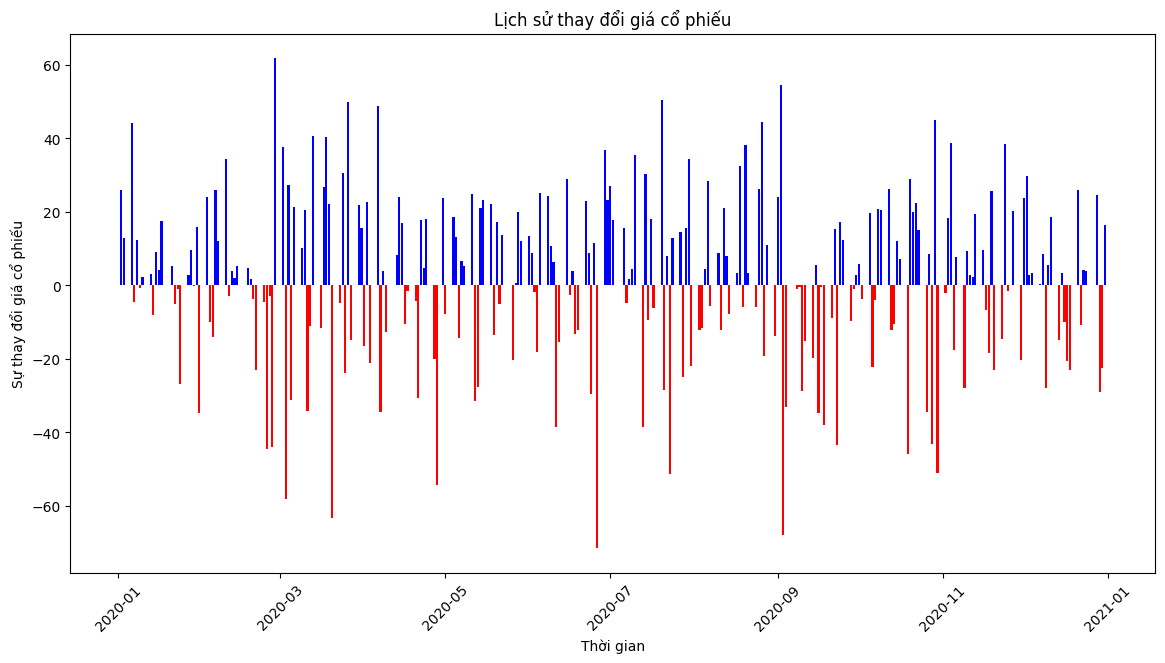

In [ ]:

df_2019 = df[(df['Date'] >= '2020-01-01') & (df['Date'] < '2021-01-01')]
df_2019['Price Change'] = df_2019['Close'] - df_2019['Open']
plt.figure(figsize=(14, 7))
plt.bar(df_2019['Date'], df_2019['Price Change'], color=['red' if x < 0 else 'blue' for x in df_2019['Price Change']])
plt.xlabel('Thời gian')
plt.ylabel('Sự biến động giá cổ phiếu')
plt.title('Lịch sử biến động giá cổ phiếu')
plt.xticks(rotation=45)
plt.show()

#### ___Kết luận___
- Các biểu đồ cho thấy sự biến động ngày càng lớn của giá cổ phiếu Google theo thời gian. Sự tăng trưởng của công ty cùng với các sự kiện toàn cầu như khủng hoảng tài chính và đại dịch COVID-19 là những yếu tố chính tác động đến mức độ biến động. Biểu đồ cũng cho thấy xu hướng tổng thể tích cực với nhiều thanh xanh hơn thanh đỏ.

#### ___3. Giá cổ phiếu thường tăng hay giảm vào các thời điểm cụ thể trong năm?___

Ta cùng xem xét qua biểu đồ box plot thể hiện phân bố sự biến động giá cổ phiếu qua các tháng trong năm: 

C:\Users\NGUYENDINHTRI\AppData\Local\Temp\ipykernel_11144\241491930.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


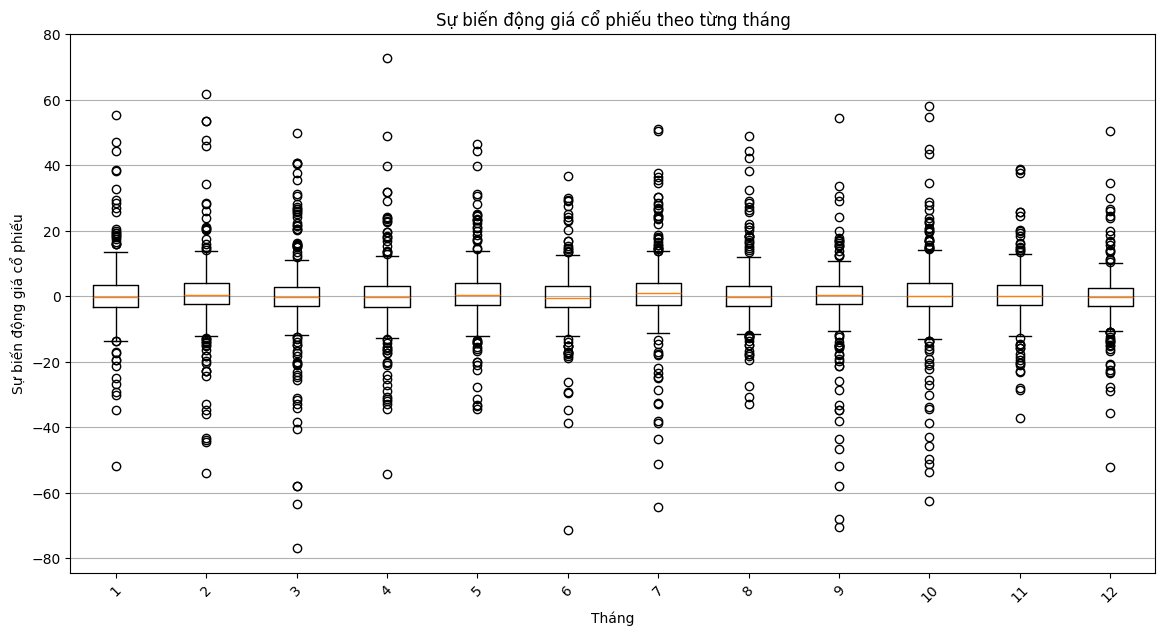

In [15]:
# tính sự biến động trung bình của cố phiếu theo từng tháng trong tất cả các năm, vừa có âm vừa có dương
df['Month'] = df['Date'].dt.month
# Tạo Box Plot để phân tích giá đóng cửa theo từng tháng
plt.figure(figsize=(14, 7))
plt.boxplot(
    [df[df['Month'] == month]['Price Change'] for month in range(1, 13)], 
    labels=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
)
plt.xlabel('Tháng')
plt.ylabel('Sự biến động giá cổ phiếu')
plt.title('Sự biến động giá cổ phiếu theo từng tháng')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


#### ___Tại sao sử dụng biểu đồ box plot lại phù hợp trong việc thể hiện phân bố sự biến động giá cổ phiếu qua các tháng trong năm?___ 

Biểu đồ box plot trực quan sự phân bố giá cổ phiếu theo các tháng trong năm theo hình thức: chia dữ liệu thành các phần và hiển thị các điểm thống kê quan trọng (như sự biến động trung bình của các tháng trong năm). Việc này rất hữu ích trong việc tổng quan biến động giá cổ phiếu và nhận biết được các tháng có sự biến động lớn hay không. 

Mặt khác, biểu đồ box plot còn nhận diện được các giá trị ngoại lai, từ đó đưa ra những góc nhìn để quản lý rủi ro cho những biến động bất thường này. 

#### ___Nhận xét___
1. Phân phối biến động theo tháng:
    - Hộp (box) trong biểu đồ cho thấy phân phối của sự biến động giá trong từng tháng. Vị trí của median (đường ngang trong hộp) gần mức 0 cho thấy sự biến động trung bình trong tháng gần như bằng 0, tức là giá cổ phiếu có sự thay đổi lớn nhưng không có xu hướng tăng hay giảm mạnh vào hầu hết các tháng.
    - Whiskers cho thấy phạm vi biến động trong tháng (từ giá trị cực tiểu đến cực đại trong phạm vi bình thường). Nếu một phần tử nằm ngoài whiskers (được gọi là outliers), đó có thể là các thay đổi giá bất thường trong một tháng nào đó.
2. Sự biến động âm và dương:
    - Sự biến động theo tháng thể hiện các giá trị âm (giảm giá) và dương (tăng giá), với các tháng có giá trị âm (biến động giảm giá) rơi vào khoảng dưới 0, và các tháng có giá trị dương (biến động tăng giá) nằm trên 0.
    - Nhìn vào biểu đồ, ta có thể thấy một số tháng có mức giảm giá mạnh, ví dụ như các tháng Mar, Oct, với các outliers ở mức thấp, cho thấy sự sụt giảm mạnh hơn so với các tháng khác.
3. Biến động mạnh trong các tháng:
    - Một số tháng như Jan, Feb, and Dec có sự biến động khá mạnh (có nhiều outliers ngoài phạm vi whiskers), cho thấy trong các tháng này cổ phiếu có thể gặp phải các thay đổi đột ngột trong giá trị, có thể do các yếu tố ngoại cảnh, thông tin thị trường, hoặc các sự kiện quan trọng.
4. Các quý của cổ phiếu:
    - Quý I (Jan, Feb, Mar): Sự biến động khá mạnh, với các outliers lớn, đặc biệt là tháng Mar, cho thấy sự sụt giảm lớn trong quý đầu năm.
    - Quý II (Apr, May, Jun): Biến động trong khoảng giữa và không có sự thay đổi quá mạnh mẽ, tuy nhiên vẫn có vài tháng có outliers.
    - Quý III (Jul, Aug, Sep): Có sự ổn định hơn với sự biến động không lớn, tuy nhiên tháng Sep có vẻ có sự thay đổi mạnh mẽ hơn.
    - Quý IV (Oct, Nov, Dec): Biến động mạnh hơn ở các tháng Oct và Dec, đặc biệt Oct có outliers với sự giảm giá đột ngột.

#### ___Kết luận___
- Biểu đồ cho thấy sự biến động của cổ phiếu trong năm khá lớn, đặc biệt là trong các tháng có outliers. Các tháng như Mar, Oct, Dec cho thấy mức giảm giá đáng kể, trong khi các tháng khác thể hiện sự ổn định hơn.
- Phân tích này giúp ta hiểu rõ hơn về sự thay đổi của giá cổ phiếu theo mùa và có thể cung cấp thông tin hữu ích để quyết định thời điểm đầu tư hoặc giao dịch.

#### ___4. Khối lượng giao dịch trung bình ở thời gian cổ phiếu biến động nhất và thời điểm ít biến động hơn khác nhau như thế nào?___
- Ở đây ta chọn thời điểm biến động lớn là giai đoạn 2018-2021.

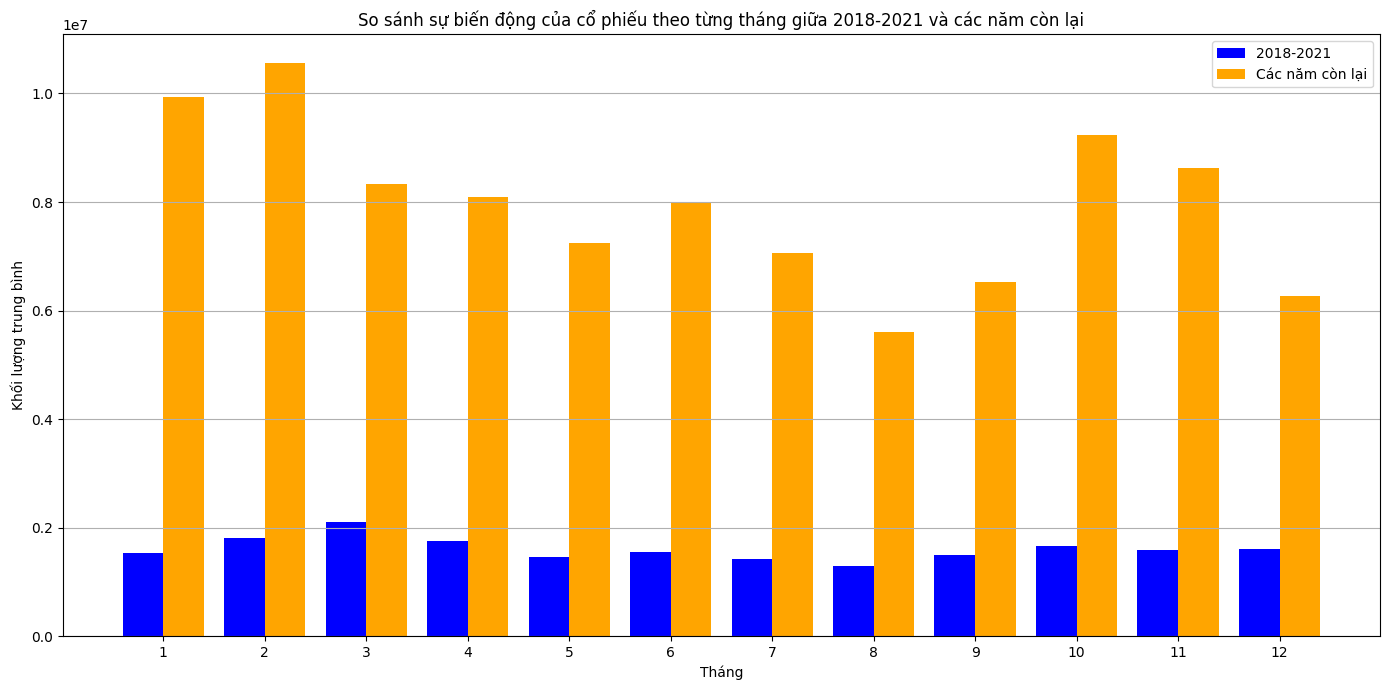

In [14]:
df['Year'] = df['Date'].dt.year
# chọn ra 3 năm 18-21
df_18_21 = df[(df['Year'] >= 2018) & (df['Year'] <= 2021)]
# gom nhóm theo tháng, tính trung bình volume
monthly_avg_volume = df_18_21.groupby('Month')['Volume'].mean().reset_index()
# các năm còn lại trừ 18-21
df_rest = df[(df['Year'] < 2018) | (df['Year'] > 2021)]
# gom nhóm theo tháng, tính trung bình volume
monthly_avg_volume_rest = df_rest.groupby('Month')['Volume'].mean().reset_index()
# vẽ biểu đồ cột ghép thể hiện volume trung bình theo từng tháng, so sánh giữa 18-21 và các năm còn lại, màu xanh là 18-21, màu đỏ là các năm còn lại
# Create the comparison bar chart
fig, ax = plt.subplots(figsize=(14, 7))

# Plot the data for 2018-2021 (blue)
ax.bar(monthly_avg_volume['Month'] - 0.2, monthly_avg_volume['Volume'], width=0.4, label='2018-2021', color='blue')

# Plot the data for other years (red)
ax.bar(monthly_avg_volume_rest['Month'] + 0.2, monthly_avg_volume_rest['Volume'], width=0.4, label='Các năm còn lại', color='orange')

# Set x and y labels
ax.set_xlabel('Tháng')
ax.set_ylabel('Khối lượng trung bình')
ax.set_title('So sánh sự biến động của cổ phiếu theo từng tháng giữa 2018-2021 và các năm còn lại')

# Set x-ticks and labels for months
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])

# Add legend
ax.legend()

# Display grid on y-axis
plt.grid(True, axis='y')

# Make sure the layout is tight and display the chart
plt.tight_layout()
plt.show()




#### ___Tại sao sử dụng biểu đồ cột ghép để thể hiện sự chênh lệch khối lượng giao dịch trung bình giữa 2 thời diểm - giá cổ phiếu biến động lớn và giá cổ phiếu biến động nhỏ qua các tháng trong năm là phù hợp?___ 

Biều đồ cột ghép cho phép người xem so sánh hai nhóm dữ liệu song song một cách rõ ràng. Khi đó, người xem có thể so sánh trực tiếp 2 thời điểm trên với nhau trong các tháng. 

Mặt khác, người xem còn có thể nắm được xu hướng tăng giảm của khối lượng giao dịch trung bình của cả 2 thời điểm theo thứ tự các tháng. Từ đó, người xem dễ dàng đưa ra góc nhìn của bản thân về xu hướng và sự chênh lệch giữa 2 thời điểm trên. 

#### ___Nhận xét___
- Khối lượng trung bình thấp hơn ở giai đoạn 2018-2021: Trong tất cả các tháng, khối lượng trung bình của giai đoạn 2018-2021 (màu xanh dương) đều thấp hơn đáng kể so với khối lượng trung bình của các năm khác (màu cam).

- Sự ổn định trong giai đoạn 2018-2021: Khối lượng trung bình cổ phiếu qua các tháng của giai đoạn 2018-2021 khá đồng đều, không có sự biến động lớn giữa các tháng.

- Khối lượng cao hơn ở các năm khác: Trong nhóm "các năm khác," khối lượng trung bình cổ phiếu cao vượt trội, với mức cao nhất vào các tháng như tháng 2, tháng 3, tháng 6, và tương đối ổn định trong các tháng còn lại.

- Chênh lệch rõ rệt: Chênh lệch lớn nhất giữa hai nhóm thời gian xảy ra vào các tháng đầu năm (tháng 1, tháng 2) và tháng cuối năm (tháng 11, tháng 12), cho thấy hoạt động giao dịch cổ phiếu trong "các năm khác" thường sôi động hơn vào những thời điểm này.

#### ___Kết luận___

- Sự khác biệt về khối lượng trung bình cổ phiếu giữa hai giai đoạn có thể phản ánh thay đổi trong các yếu tố thị trường như chính sách kinh tế, tâm lý nhà đầu tư, hoặc điều kiện kinh tế chung. Giai đoạn 2018-2021 có thể bị ảnh hưởng bởi các yếu tố như đại dịch COVID-19, dẫn đến khối lượng giao dịch thấp hơn.

#### __KẾT LUẬN TỔNG QUAN VỀ KHOẢNG THỜI GIAN DÀI HẠN CỦA CỔ PHIẾU GOOGLE:__ 

- Giá cổ phiếu Google cho thấy một xu hướng tăng trưởng dài hạn và mạnh mẽ, với một mức tăng trưởng ổn định từ năm 2004 đến nay. Sự tăng trưởng dài hạn và mạnh mẽ này đã phản ánh vô cùng rõ nét sự thành công của Google khi doanh nghiệp mở rộng lĩnh vực kinh doanh sang nhiều mảng khác nhau, trên nhiều lĩnh vực khác nhau.  

- Tuy nhiên, doanh nghiệp cũng trải qua những giải đoạn biến động lớn như khủng hoảng tài chính vào năm 2008 –2009 và đại dịch COVID-19 (2020, 2021). Đây là những thời điểm mà cổ phiếu Google chịu áp lực giảm giá mạnh do khủng hoảng kinh tế. Tuy nhiên sau đó, doanh nghiệp đã phục hồi nhanh chóng nhờ vào sự vững chắc trong mô hình kinh doanh của chính mình. 

- Giai đoạn 2020-2022 chứng kiến mức tăng trưởng giá cổ phiếu cao nhất của Google nhờ vào sự tin tưởng tích cực từ các nhà đầu tư. Điều này càng củng cố thêm rằng Google là một tập đoàn doanh nghiệp lớn có xu hướng tăng trưởng mạnh mẽ. 

- Sự biến động giá cổ phiếu của Google cũng thay đổi theo các tháng trong năm (với tháng 3, tháng 10, tháng 12 là có xu hướng biến động mạnh mẽ hơn so với các tháng khác). 

- Đồng thời, khối lượng giao dịch cũng có thay đổi theo thời điểm. Trong giai đoạn biến động lớn (2018 –2021), khối lượng giao dịch giảm, nhưng trong các năm khác, khối lượng giao dịch thường sôi động hơn. 